In [48]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt

def draw_class_barplot(
    path: str,
    title: str):
    
    dir_list = listdir(path)

    classLenLst = []
    for class_name in dir_list:
        classLenLst.append(len(listdir(path+class_name)))

    df_dict = dict()
    df_dict["name"] = dir_list
    df_dict["count"] = classLenLst

    df= pd.DataFrame(df_dict)

    plt.figure(figsize=(100,100))
    df.plot(kind="bar", x='name', y='count')
    plt.xlabel("class name")
    plt.ylabel("count")
    plt.title(title)

    return df

전체 데이터의 수: 23454


<Figure size 10000x10000 with 0 Axes>

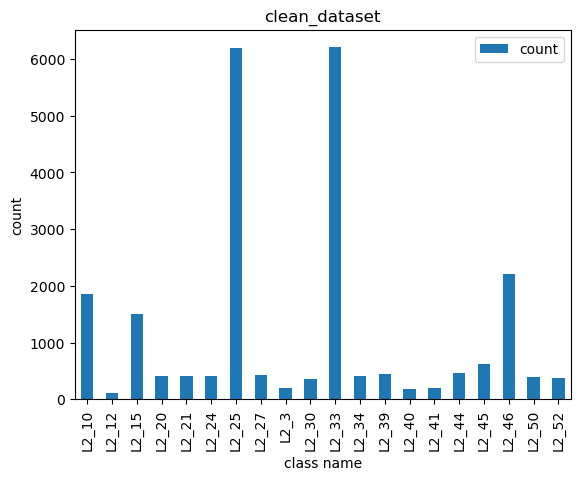

In [49]:
df = draw_class_barplot(r'..\\clean_dataset\\', 'clean_dataset')

print(f"전체 데이터의 수: {df['count'].sum(0)}")

## L2_12, L2_3과 같은 클래스는 데이터가 너무 없어서 테스트 셋 나누기에 곤란하다.

만약 전체의 20%를 테스트 셋으로 사용한다고 가정하자, 그러면 다음과 같은 문제가 발생한다.

**23454개의 20%는 4690개 정도인데, 각 클래스별로 나누면 대략 240개 정도의 test 데이터가 필요하다. 하지만 L2_12, L2_3 클래스에게는 너무나 많은 데이터이다.**

## 우선은 클래스별 20%의 데이터만 사용하도록 샘플링

In [21]:
from typing import Dict
from os import listdir

# Use my class
import sys
sys.path.append("../")
from load import Load

def train_test_dict(
    dataset_path: str,
    train_percentage: float) -> Dict[str, list]:
    
    Loader = Load()

    train_dict = {}
    test_dict = {}
    
    for class_name in listdir(dataset_path):
        filename_list = Loader.filename(dataset_path, class_name)
        train_num = round(len(filename_list) * train_percentage)
        
        train_dict[class_name] = filename_list[:train_num]
        test_dict[class_name] = filename_list[train_num:]
        
    return train_dict, test_dict

In [28]:
train_dict, test_dict = train_test_dict('..\\clean_dataset', 0.8)

In [33]:
import os
import shutil

# make train dataset
for class_name, filename_list in train_dict.items():
    os.makedirs(os.path.dirname("..\\final_dataset\\train\\" + class_name + "\\"), exist_ok=True)
    for filename in filename_list:
        shutil.copy(filename, "..\\final_dataset\\train\\" + class_name + "\\" + filename.split("\\")[-1])
        
# make test dataset
for class_name, filename_list in test_dict.items():
    os.makedirs(os.path.dirname("..\\final_dataset\\test\\" + class_name + "\\"), exist_ok=True)
    for filename in filename_list:
        shutil.copy(filename, "..\\final_dataset\\test\\" + class_name + "\\" + filename.split("\\")[-1])

## 이제 나눠진 데이터의 분포를 보자

전체 학습 데이터의 수: 18762
전체 테스트 데이터의 수: 4692


<Figure size 10000x10000 with 0 Axes>

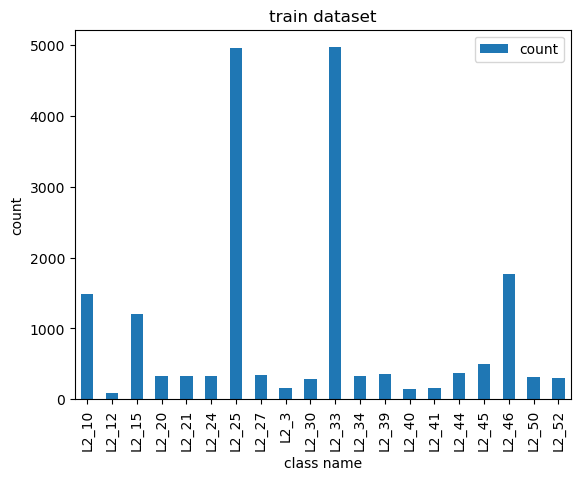

<Figure size 10000x10000 with 0 Axes>

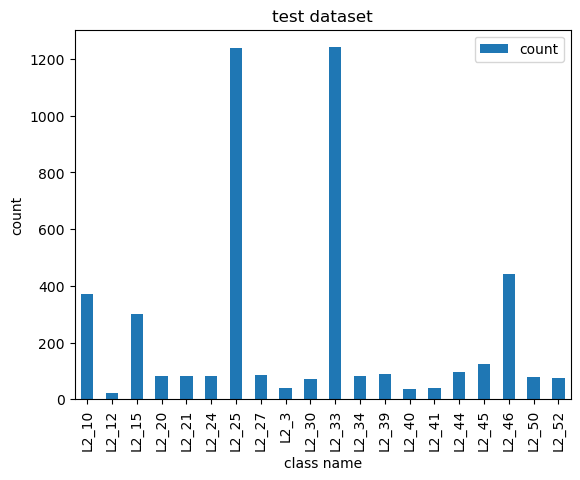

In [51]:
df = draw_class_barplot(r'..\\final_dataset\\train\\', 'train dataset')
print(f"전체 학습 데이터의 수: {df['count'].sum(0)}")

df = draw_class_barplot(r'..\\final_dataset\\test\\', 'test dataset')
print(f"전체 테스트 데이터의 수: {df['count'].sum(0)}")